<a href="https://colab.research.google.com/github/gabrielborja/parc_de_montjuic/blob/main/game_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Analysis

## Uploading packages and data

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
# Setting the plot size
sns.set(rc = {'figure.figsize': (12, 5)})

In [2]:
# Uploading google sheet data from drive
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc2 = gspread.authorize(creds)

# Loading dataset from google sheet
wb2 = gc2.open('sjakk_db')
ws2_data = wb2.sheet1
records_2 = ws2_data.get_all_records()

# Converting to a Pandas DataFrame
df1 = pd.DataFrame.from_records(records_2)
df1.tail(1)

,date,rival,color,win,opening,opening_oponent,moves,rating,blun,awar,...,60sf,10tl,20tl,30tl,40tl,50tl,60tl,Comment,takeaway,analysis
41,18-07-2024,Enomis441,b,1.0,1.c6_Caro-Kann_defense,Hillbilly_attack,24,916,0,1,...,,9.6,8.67,,,,,11. Missed to take the missplaced Knight on a3...,Remember to properly defend your king when cas...,https://www.chess.com/game/live/108283612546


## Metrics calculation

In [33]:
# Calculating metrics
mov_t = round(df1['moves'].mean(), 1)
mov_w = round(df1[df1['color'] == 'w']['moves'].mean(), 1)
mov_b = round(df1[df1['color'] == 'b']['moves'].mean(), 1)
df_mov = pd.DataFrame((mov_t, mov_w, mov_b), index=['total','white','black'], columns=['avg_moves'])
df_mov

,avg_moves
total,40.9
white,40.8
black,41.0


## Analysis Dashboard

In [3]:
# Adding interactivity to graphs
import ipywidgets as widgets
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual

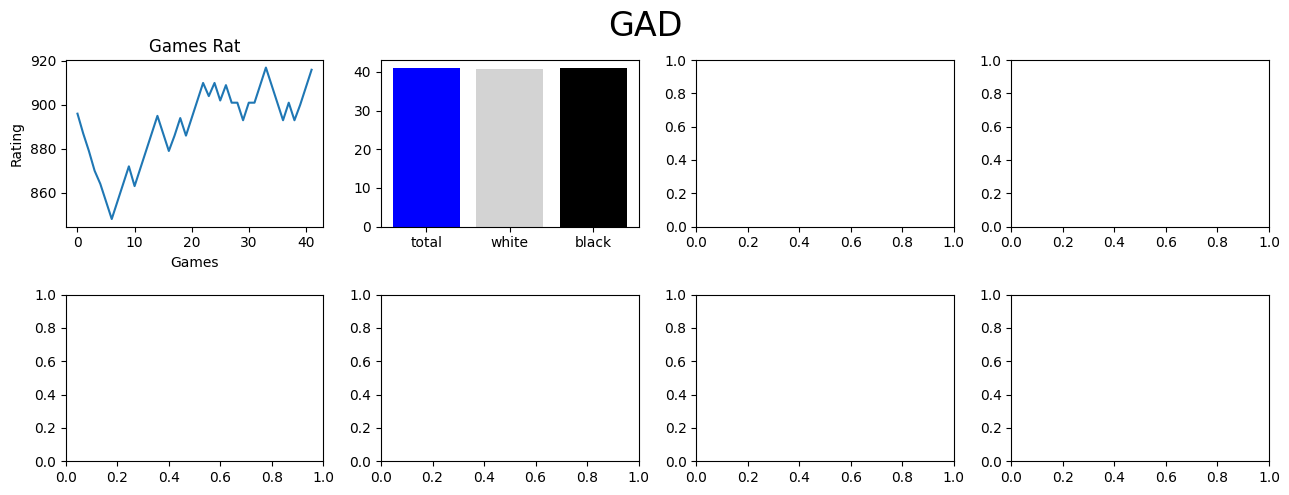

In [45]:
# Creating a function to plot the interactive dashboard

# def plot_analysis_dashboard(year, month):
# """Plot the analysis of games"""

# Creating four subplots and unpack the output array immediately
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(13,5))

# Setting title for the figure
fig.suptitle("GAD", fontsize=24)

# Plotting multiple graphs
ax1.plot(df1['rating'])
ax2.bar(df_mov.index, df_mov['avg_moves'], color=['b','lightgray','k']) #['cornflowerblue','lightsteelblue','black']

#Customizing axes labels and titles for first axes figure
ax1.set_xlabel('Games')
ax1.set_ylabel('Rating')
ax1.set_title(f'Games Rat')

#Prevent from axis to colliding or overlaping one another.
fig.tight_layout()
fig.subplots_adjust(top=0.88)